In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib import gridspec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
plt.style.use("../paper.mplstyle")

import h5py

In [30]:
ee = np.logspace(2,6,41)
ee_widths = ee[:-1]-ee[1:]
ee_cents  = (ee[:-1]+ee[1:])/2.

mc = h5py.File('/data/ana/SterileNeutrino/IC86/HighEnergy/SPE_Templates/Nominal/Ares/IC86.AVG/Merged/Ares_IC86.AVG_0.97_lite_platinum_98000.h5')

f = np.load('../data/mc_dn_dz/ch5-m1000_Nominal_dn_dz.npy')

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """


In [31]:
mc_e = mc['NuEnergy']['value']

h_flux = np.histogram(mc_e, bins=ee, weights=f)
h = np.histogram(mc_e, bins=ee)

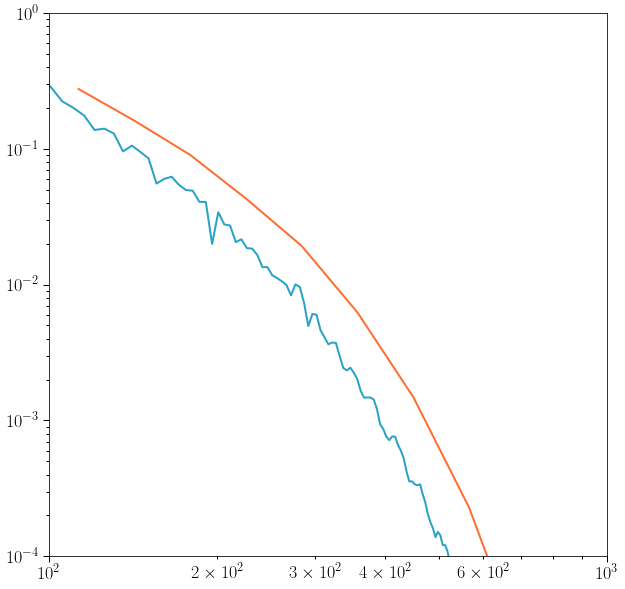

In [37]:
_ = np.load('../data/qr_dn_dz/ch5-m1000_dn_dz.npy')[0,-1,:]+np.load('../data/qr_dn_dz/ch5-m1000_dn_dz.npy')[1,-1,:]
eeee = np.linspace(10./1000, 1000, 200)

plt.plot(eeee, _*1000)
plt.plot(ee_cents, h_flux[0]/[float(_) for _ in h[0]])
plt.loglog()
plt.xlim(100, 1000)
plt.ylim(1e-4, 1)
plt.show()

In [3]:
from scipy.interpolate import bisplrep, bisplev

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


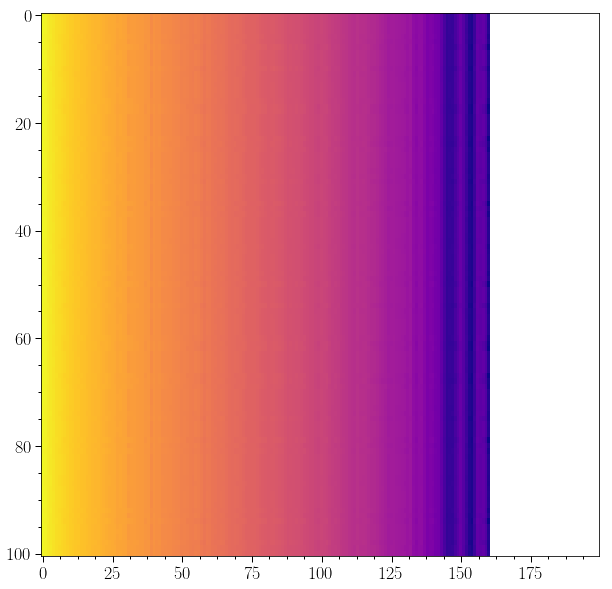

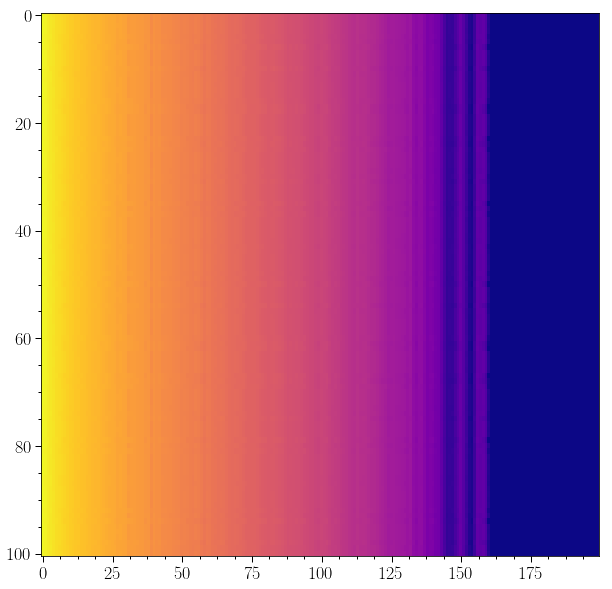

In [4]:
lflux = np.log([_ for _ in np.load('../data/qr_dn_dz/ch5-m1000_dn_dz.npy')[0]])
plt.imshow(lflux, aspect='auto')
plt.show()
lflux_isfin = np.where(np.isfinite(lflux))
lflux_isinf = np.where(~np.isfinite(lflux))
lflux[lflux_isinf] = np.min(lflux[lflux_isfin])

plt.imshow(lflux, aspect='auto')
plt.show()

In [5]:
xnew_edges, ynew_edges = np.mgrid[np.radians(80):np.radians(180):101j, np.log(10./1000):np.log(1000):200j]

In [ ]:
# x = xnew_edges
# y = ynew_edges
# z = lflux

# print(len(x)==len(y)==len(z))

tck = bisplrep(xnew_edges, ynew_edges, lflux, s=0)

In [6]:
bisplev(np.radians(95), 2.7, tck)

NameError: name 'tck' is not defined